## Homework Assignment - 01

### **VIVAKA NAND**

### Text classification

Aim: build several classification models and compare quality

Dataset: https://www.kaggle.com/competitions/nlp-getting-started/data

# Task 1:	Build TF-IDF, BoW models:

### Importing Necessary Libraries
I loaded the necessary machine learning, evaluation, and text preprocessing libraries into this code.  Lemmatization, stopword elimination, and tokenization are handled by NLTK, and feature extraction, model training, and performance matrix are handled by scikit-learn.  The required NLTK resources for text processing are also downloaded using NLTK.

In [4]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download(['punkt', 'stopwords', 'wordnet', 'punkt_tab'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Loading Dataset

In [2]:
# Here loaded the dataset
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In this dataset there are five columns these are target, text, location, keyword, and id.  Each entry is uniquely identified by the id column.  The given rows have missing values (NaN) in the location and keyword columns.  The target column shows if the tweet is about an actual disaster, whereas the text column contains tweet content that describes numerous disaster-related occurrences (1).

### Summary of Dataset

In [3]:
#Here we use info method which summarizes DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


The data includes 5 columns (id, keyword, location, text, and target) and 7,613 rows.  The column keyword, location, and text are of object type but the id column and target column are of type int64.  Although 5,080 non-null values exist in the location column as there are 2,533 missing entries, there are 7,552 non-null values in the keyword column as it represents 61 missing values. There are no missing values in the column of text; all of it is complete.  The dataset uses around 297.5 KB of memory space.

## **Preprocess data (tokenization, lemmatization/stemming, …). Describe why did you choose particular tokenizer/stemmer, etc.**

To preprocess text data, we will eliminates stopwords, special characters, URLs, mentions, lowercases, tokenizes, and applies lemmatization.   

- **Selection of Lemmatizer, Stopwords, and Tokenizer:**  
 1. **NLTK's `word_tokenize`**: Select it due to its ability to reliably separate text into meaningful words while efficiently managing punctuation.  
 2. **NLTK's Stopwords**: it eliminates unnecessary predetermined list of frequently used English stopwords, to enhance the model performance.  

 3. **WordNetLemmatizer**: Lemmatization preserves linguistic correctness and increases the accuracy of NLP models by returning meaningful root words (e.g., "running" → "run"), in contrast to stemming.

In [4]:
word_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocessing(tweets):
    tweets = tweets.lower()  # It convert the tweets to lowercase
    tweets = re.sub(r"http\S+|www\S+", "", tweets)  # it removes the URLs
    tweets = re.sub(r"@\w+", "", tweets)  # It removes the mentions (@username)
    tweets = re.sub(r"#(\w+)", r"\1", tweets)  # It keep hash-tags words (#flood → flood)
    tweets = re.sub(r"[^\w\s]", "", tweets)  # It removes special characters except words and spaces

    tokens_ = word_tokenize(tweets)  # It tokenize the text
    tokens_ = [word for word in tokens_ if word not in stop_words]  # It removes stopwords
    tokens_ = [word_lemmatizer.lemmatize(word) for word in tokens_]  # Lemmatization

    return " ".join(tokens_)  # It convert back to text and return

# Apply preprocessing to the text column
df['clean_text'] = df['text'].apply(preprocessing)

# Save preprocessed(cleaned) text data to csv file
df.to_csv("train_cleaned.csv", index=False)

In [5]:
# Display some samples of actual and cleaned text
df[['text', 'clean_text']].head(30)

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfire update california hwy 20 closed dire...
6,#flood #disaster Heavy rain causes flash flood...,flood disaster heavy rain cause flash flooding...
7,I'm on top of the hill and I can see a fire in...,im top hill see fire wood
8,There's an emergency evacuation happening now ...,there emergency evacuation happening building ...
9,I'm afraid that the tornado is coming to our a...,im afraid tornado coming area


## **Apply TF-IDF, BoW vectorizers**

### **Data Preprocessing and Train Test Split**
To transform text to numerical feature for machine learning, here first we load preprocessed data and apply Bag-of-Words and TF-IDF text vectorization techniques.
The BoW technique is helpful for models applying frequency patterns but no context sensitivity because it addresses text by identifying word frequency.  We can improve with TF-IDF as it gives heavy weights to the words having a low document frequency but significant and reduces common words' influence. Here we created a feature matrix with more than 14,000 distinct words using both the vectorization techniques and subsequently divided into 80% training and 20% testing sets.  While TF-IDF boosts classification by focusing on discriminating words, BoW is computationally effective and suits models such as Logistic Regression.

In [6]:
# Load cleaned preprocessed dataset
df = pd.read_csv("train_cleaned.csv")

# Here Initialize count vectorizers
vectorizer_bow = CountVectorizer()

# Fit and transform text data
bow_X = vectorizer_bow.fit_transform(df['clean_text'])
bow_y = df['target']

# Split into train and test sets (80% train, 20% test)
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_X, bow_y, test_size=0.2, random_state=42)
print('BoW Vectorizer Train Test sets Shape')
print(X_train_bow.shape)
print(X_test_bow.shape)
print(y_train_bow.shape)
print(y_test_bow.shape)

# Here initialize the TF-IDF vectorizers
vectorizer_tfidf = TfidfVectorizer()

# Fit and transform text data
tfidf_X = vectorizer_tfidf.fit_transform(df['clean_text'])
tfidf_y = df['target']

# Here split into train and test sets (80% train, 20% test)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_X, tfidf_y, test_size=0.2, random_state=42)
print('\n\nTF-IDF Vectorizer Train Test sets Shape')
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(y_train_tfidf.shape)
print(y_test_tfidf.shape)

BoW Vectorizer Train Test sets Shape
(6090, 14441)
(1523, 14441)
(6090,)
(1523,)


TF-IDF Vectorizer Train Test sets Shape
(6090, 14441)
(1523, 14441)
(6090,)
(1523,)


Splited Both the BoW and TF-IDF vectorizers' train and test sets in identical shape, consisting of 1523 test samples and 6090 training samples with 14441 features apiece.

## **Logistic Regression and  SVM models to classify texts**

### **Training Logistic Regression and SVM Models on BoW Vectorizer**

Here we train **Logistic Regression** and **Support Vector Machine (SVM)** models for text categorization, using the **Bag-of-Words (BoW)**. To check the performance of models on test set, we use a **classification report** and a **confusion matrix**. For SVM  model use the **linear kernel** because it works well with text data, and Logistic Regression is a good starting model.


In [7]:
# Training both models on Bag of Words
# Train Logistic Regression
lr_bow_model = LogisticRegression()
lr_bow_model.fit(X_train_bow, y_train_bow)

# Train Support Vector Machine (SVM)
svm_bow_model = SVC(kernel='linear')
svm_bow_model.fit(X_train_bow, y_train_bow)

# Predictions
lr_preds_bow = lr_bow_model.predict(X_test_bow)
svm_preds_bow = svm_bow_model.predict(X_test_bow)

# Evaluate models
print("Logistic Regression BoW Model Performance:")
print('\n\tClassification Report')
print(classification_report(y_test_bow, lr_preds_bow))

print("\n\nSVM BoW Model Performance:")
print('\n\tClassification Report')
print(classification_report(y_test_bow, svm_preds_bow))

Logistic Regression BoW Model Performance:

	Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



SVM BoW Model Performance:

	Classification Report
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       874
           1       0.74      0.69      0.71       649

    accuracy                           0.77      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.76      0.77      0.76      1523



**Classification Report Results of Logestic Regression and SVM Model**

At 80% accuracy, precision of 0.80 for class 0 (not disaster) and 0.79 for class 1 (disaster) and recall of 0.86 for class 0 and 0.71 for class 1, the Logistic Regression BoW model performs better for detecting non-disaster tweets. The SVM BoW model is a bit lower than Logistic Regression in recall and precision for both classes but with slightly poorer accuracy of 77%, precision of 0.78 for class 0 and 0.74 for class 1, and recall of 0.82 for class 0 and 0.69 for class 1.  Both models are quite good but Logistic Regression slightly performs better in classification, especially in classifying class 1 (tweets about disasters).

**Confusion Matrix**

Here we define a function to create a confusion matrix as a heatmap with labeled axes, and shows true vs predicted labels.

In [8]:
# Confusion Matrix
def confusion_matrix_plot(true_y, pred_y, trained_model):
    conf_mt = confusion_matrix(true_y, pred_y)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Disaster", "Disaster"], yticklabels=["Not Disaster", "Disaster"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {trained_model}")
    plt.show()

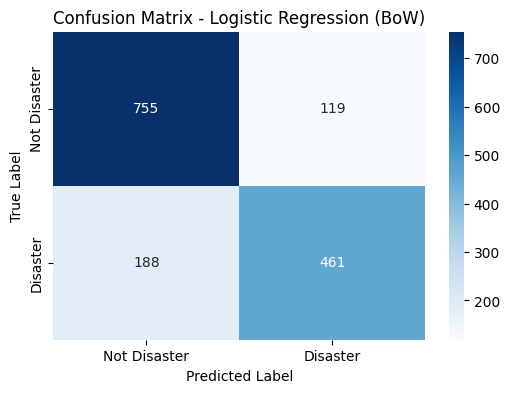

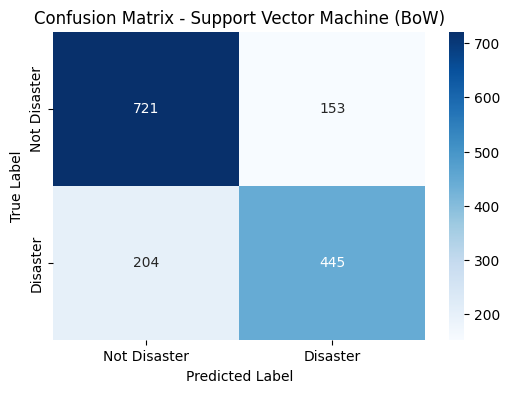

In [9]:
# Plot confusion matrix
confusion_matrix_plot(y_test_bow, lr_preds_bow, "Logistic Regression (BoW)")
confusion_matrix_plot(y_test_bow, svm_preds_bow, "Support Vector Machine (BoW)")

- **Confusion Matrix Results**:
The confusion matrices compare Logistic Regression and Support Vector Machine (SVM) with Bag of Words (BoW) representation for binary classification. Logistic Regression is slightly superior, correctly classifying more disaster cases (461 vs. 445) and incorrectly classifying fewer instances overall. It produces fewer false positives (119 vs. 153) and false negatives (188 vs. 204) than SVM, indicating improved balance in classification. Even though both models are good, Logistic Regression is the superior of the two in this case.

### **Training Logistic Regression and SVM Models on TF-IDF Vectorizer**

Here we use the **TF-IDF (Term Frequency-Inverse Document Frequency)** representation to train **Logistic Regression** and **Support Vector Machine (SVM)** models for text classification.  Following training, we eavluate both models on the test set using a **confusion matrix** heatmap and a **classification report** (precision, recall, and F1-score).

In [10]:
# Training Logistic Regression Model
lr_tfidf_model = LogisticRegression()
lr_tfidf_model.fit(X_train_tfidf, y_train_tfidf)

# Training Support Vector Machine (SVM) Model
svm_tfidf_model = SVC()
svm_tfidf_model.fit(X_train_tfidf, y_train_tfidf)

# Predictions on test set
lr_preds_tfidf = lr_tfidf_model.predict(X_test_tfidf)
svm_preds_tfidf = svm_tfidf_model.predict(X_test_tfidf)

# Evaluate models performance
print("Logistic Regression TF-IDF Model Performance:")
print('\n\tClassification Report')
print(classification_report(y_test_tfidf, lr_preds_tfidf))

print("\n\nSVM TF-IDF Model Performance:")
print('\n\tClassification Report')
print(classification_report(y_test_tfidf, svm_preds_tfidf))

Logistic Regression TF-IDF Model Performance:

	Classification Report
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       874
           1       0.84      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523



SVM TF-IDF Model Performance:

	Classification Report
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       874
           1       0.85      0.63      0.73       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.78      1523
weighted avg       0.81      0.80      0.79      1523



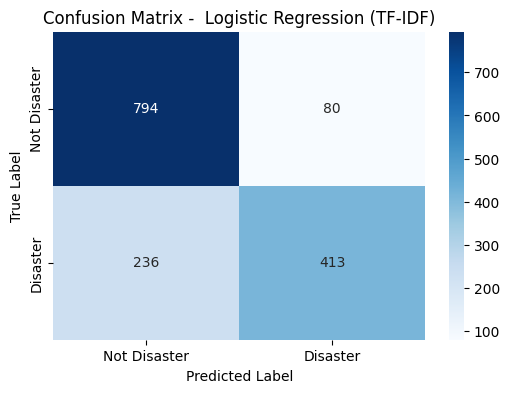

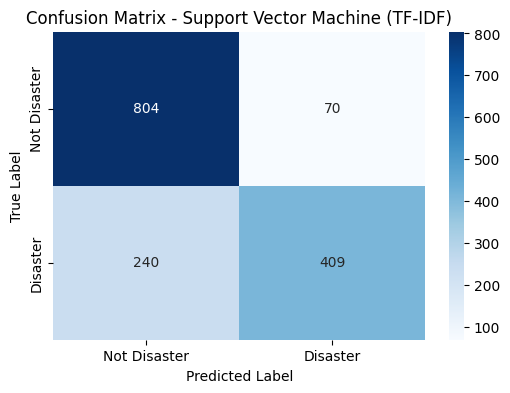

In [11]:
confusion_matrix_plot(y_test_tfidf, lr_preds_tfidf, " Logistic Regression (TF-IDF)")
confusion_matrix_plot(y_test_tfidf, svm_preds_tfidf, "Support Vector Machine (TF-IDF)")

- **Evaluation Results**

The overall accuracy of both models is 79%; however, the Logistic Regression model has a lower recall (64%) for disaster tweets and a greater recall (91%) for non-disaster tweets.  With a little higher precision (80%) but a lower recall (69%), the SVM model offers a more balanced precision-recall tradeoff.  Overall, both models display comparable weighted F1-scores, suggesting that they are equally effective at differentiating between tweets about disasters and those that are not.

### **Hyperparameter Tuning to get the best model**

For hyperparameter tuning we use Grid Search and Randomized Search to adjust the hyperparameters for the Support Vector Machine (SVM) and Logistic Regression models, respectively.

 - **Logistic Regression:** For Logisitic Regression we will utilize GridSearchCV methodically search through various values of C (regularization strength) and solver types (liblinear, saga) using five-fold cross-validation, to determine the optimal combination for maximum accuracy,.
 - **SVM:** For SVM we will utilize RandomizedSearchCV, because SVM has a bigger hyperparameter space than Grid Search. To speed up the search without sacrificing efficacy, it randomly selects ten combinations of C (regularization strength), kernel type (linear, rbf), and gamma (scale, auto).


In [12]:
# Define grid for hyperparameter tuning
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga', "lbfgs"]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # kernels (Linear and RBF)
    #'gamma': ['scale', 'auto']  # Kernel coefficient (for RBF)
}

# Logistic Regression model Grid Search
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_tfidf, y_train_tfidf)

# SVM Model Randomized Search (for large param spaces it is faster than GridSearch)
random_svm = RandomizedSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
random_svm.fit(X_train_tfidf, y_train_tfidf)

# Best scores and parameters
print("Best paramters for Logistic Regression:", grid_lr.best_params_)
print("Best Score for Logistic Regression:", grid_lr.best_score_)

print("Best paramters for SVM:", random_svm.best_params_)
print("Best Score for SVM:", random_svm.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best paramters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.7939244663382594
Best paramters for SVM: {'kernel': 'linear', 'C': 1}
Best Score for SVM: 0.7942528735632184


Now we will use test dataset to evaluate the **fine-tuned Logistic Regression and SVM models**.  

 - We used `best_estimator_` to choose the **best models** from the hyperparameter tuning steps.  
 - And the evaluate models on test data to make predictions, and a use **classification report** method to displays precision, recall, and F1-score, and **confusion matrix** to show true and false classifications of models.


In [13]:
# Evaluate using best parameters on Test Data
lr_best_est = grid_lr.best_estimator_
svm_best_est = random_svm.best_estimator_

lr_best_preds = lr_best_est.predict(X_test_tfidf)
svm_best_preds = svm_best_est.predict(X_test_tfidf)

# Evaluate on fined tuned models
print("Logistic Regression Fine-Tuned Model Performance:")
print('\n\tClassification Report')
print(classification_report(y_test_tfidf, lr_best_preds))


print("\n\nSVM Fine-Tuned Model Performance:")
print('\n\tClassification Report')
print(classification_report(y_test_tfidf, svm_best_preds))

Logistic Regression Fine-Tuned Model Performance:

	Classification Report
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       874
           1       0.84      0.64      0.73       649

    accuracy                           0.79      1523
   macro avg       0.81      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523



SVM Fine-Tuned Model Performance:

	Classification Report
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.69      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



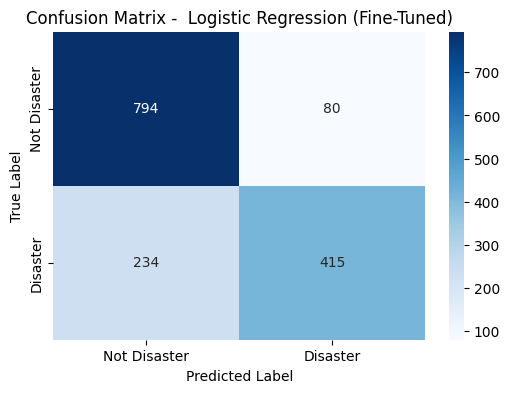

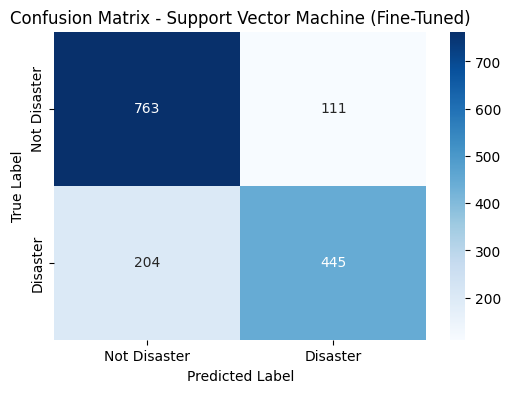

In [14]:
confusion_matrix_plot(y_test_tfidf, lr_best_preds, " Logistic Regression (Fine-Tuned)")
confusion_matrix_plot(y_test_tfidf, svm_best_preds, "Support Vector Machine (Fine-Tuned)")

- **Hyperparameter Tuning Results**

From above evaluation matrixs it is clear that both tuned models SVM and Logistic Regression models shows balanced performance in both classes, with a 79% accuracy rate.  Certain disaster-related class (1) are misclassified,we observeed from the accuracy and recall metrics, which show that class 0 (non-disaster) is predicted more accurately than class 1 (disaster), with a greater recall for class 0 and a slightly lower recall for class 1.  By optimizing the trade-off between precision and recall, fine-tuning made the models marginally better than their baseline models.  With a reduced recall for class 1 and a greater recall for class 0, the SVM model performs similarly to logistic regression, indicating a minor bias toward non-disaster predictions.

### Conclusion
We successfully implemented BoW and TF-IDF models to transform text data into numerical representations in order to support effective disaster tweet classification. The fine-tuned SVM and Logistic Regression models produced a balanced accuracy of 79% but it displays a slight bias toward non-disaster classification. Fine-tuning optimized precision-recall trade-offs but still misclassified some disaster cases. However, performance boost over baseline models was achieved through hyperparameter tuning. In future work can focus on addressing class imbalance with advanced techniques such as oversampling, ensemble learning, or deep learning to further enhance disaster classification accuracy.

### Kaggle Submission File

In [15]:
test_df = pd.read_csv("test.csv")  # Load test data
test_df["cleaned_text"] = test_df["text"].apply(preprocessing)

X_test_k = vectorizer_bow.transform(test_df["cleaned_text"])
y_preds_sub_1 = lr_bow_model.predict(X_test_k)

sub_file_1 = pd.DataFrame({"id": test_df["id"], "target": y_preds_sub_1})
sub_file_1.to_csv("submission_t1.csv", index=False)

# Task 2:	Build a model based on neural networks, trained from scratch (RNN, LSTM, etc.):

In this below cell, we imports necessary modules from TensorFlow to build a neural network for text processing. It uses an LSTM-based model with bidirectional layers and an embedding layer for sequence modeling, suitable for tasks like text classification. we use the Tokenizer and pad_sequences for preprocessing the text data before feeding it into the model.

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization, Input, Add, GlobalMaxPooling1D, Attention, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

We will load previously cleaned "train_cleaned.csv" dataset using Pandas, and use a Tokenizer with vocabulary size 10,000 to use the maximum memory. We will replace the Out-of-vocabulary words into a special token. Then convert the Text data into numerical sequences and padded to a given length (MAX_LEN=50) for homogeneous input. Finaly extract the labels for classification Labels (0 = non-disaster, 1 = disaster), and spilt the data into 80-20 for effective model testing and preventing data leakage.

In [20]:
# Load dataset
df = pd.read_csv("train_cleaned.csv")

# Tokenization
MAX_VOCAB = 10000  # To keep the maximum words
MAX_LEN = 50  # Max tweet length (after padding)
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

# Convert text to sequences
X = tokenizer.texts_to_sequences(df['clean_text'])
X = pad_sequences(X, maxlen=MAX_LEN, padding='post')  # Ensure uniform length
y = df['target'].values  # Binary labels (0 = not disaster, 1 = disaster)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Describe why did you chose the architecture/hyperparameters**

### **Training LSTM Model**
For the LSTM model architecture we use an embedding layer to turn text into dense vectors in order to classify tweets about disasters.  We use Droupout Layer to avoid overfitting, to captured past and future context applied a Bidirectional LSTM. Use a Dense layer for feature learning follows the processing of sequential dependencies by another LSTM. At last applied sigmoid layer to produce binary classification probabilities. For effective learning and precise predictions, trained the model for ten epochs using the Adam optimizer and binary cross-entropy loss.

In [28]:
# Initialize LSTM model
model_lstm = Sequential([Embedding(input_dim=MAX_VOCAB, output_dim=100, input_length=MAX_LEN),
                        Bidirectional(LSTM(128, return_sequences=True)),
                        Dropout(0.5),
                        LSTM(64),
                        Dropout(0.5),
                        Dense(64, activation='relu'),
                        Dense(1, activation='sigmoid')
                        ])

# Compile model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Model Test Accuracy: {accuracy:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5766 - loss: 0.6843 - val_accuracy: 0.5739 - val_loss: 0.6831
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5717 - loss: 0.6854 - val_accuracy: 0.5739 - val_loss: 0.6840
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5818 - loss: 0.6821 - val_accuracy: 0.5739 - val_loss: 0.6842
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5665 - loss: 0.6857 - val_accuracy: 0.5739 - val_loss: 0.6822
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5636 - loss: 0.6858 - val_accuracy: 0.5739 - val_loss: 0.6826
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5679 - loss: 0.6847 - val_accuracy: 0.5739 - val_loss: 0.6826
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5773 - loss: 0.6819 - val_accuracy: 0.5739 - val_loss: 0.6822
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5670 - loss: 0.6846 - val_accuracy: 0.573

### **Training RNN Model**

Here in this RNN Model architecture we use the first layer, called Embedding, transforms words into dense vectors with 100 dimensions.  After processing sequential input while preserving temporal dependencies, a SimpleRNN layer (128 units) employs a Dropout (0.5) to avoid overfitting.  A second Dropout layer comes after a second SimpleRNN layer (64 units) refines the learned features.  The last sigmoid layer, which produces probabilities for binary classification, comes after a Dense (64, ReLU) layer recovers significant patterns.  We use the Adam optimizer and binary cross-entropy loss to construct the model, which is then trained for 10 epochs with a batch size of 32.  In order to ensure its efficacy for text-based classification tasks, the evaluation analyzes accuracy on test data.

In [29]:
# Initialize RNN model
model_rnn = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=100, input_length=MAX_LEN),
    SimpleRNN(128, return_sequences=True),
    Dropout(0.5),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history_rnn = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test)
print(f"RNN Model Test Accuracy: {accuracy_rnn:.4f}")

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5251 - loss: 0.7188 - val_accuracy: 0.5739 - val_loss: 0.6867
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5506 - loss: 0.7050 - val_accuracy: 0.5752 - val_loss: 0.6847
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5145 - loss: 0.7121 - val_accuracy: 0.5246 - val_loss: 0.6954
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5270 - loss: 0.7035 - val_accuracy: 0.5686 - val_loss: 0.6849
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5258 - loss: 0.7030 - val_accuracy: 0.5870 - val_loss: 0.6768
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5485 - loss: 0.6933 - val_accuracy: 0.5305 - val_loss: 0.6841
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5307 - loss: 0.6970 - val_accuracy: 0.5739 - val_loss: 0.6821
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5659 - loss: 0.6858 - val_acc

### **Training GRU Model**

Here in GRU-based model architecture we use an Embedding layer that converts words into dense 100-dimensional vectors. Use a Bidirectional GRU (128 units) captures long-range dependencies in both forward and backward directions, followed by a Dropout (0.5) to reduce overfitting. A GRU (64 units) further refines sequential patterns, followed by another Dropout layer. A Dense (64, ReLU) layer extracts high-level features before the final sigmoid layer outputs probabilities for binary classification. And finaly the compile the model with binary cross-entropy loss and Adam optimizer and trained for 10 epochs with batch size 32. We chose GRUs for their efficiency in handling sequential text data while reducing computational complexity compared to LSTMs.

In [30]:
# Initialize GRU Model
model_gru = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=100, input_length=MAX_LEN),
    Bidirectional(GRU(128, return_sequences=True)),
    Dropout(0.5),
    GRU(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history_gru = model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss_gru, accuracy_gru = model_gru.evaluate(X_test, y_test)
print(f"GRU Model Test Accuracy: {accuracy_gru:.4f}")


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5716 - loss: 0.6861 - val_accuracy: 0.5739 - val_loss: 0.6822
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5627 - loss: 0.6869 - val_accuracy: 0.5739 - val_loss: 0.6824
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5730 - loss: 0.6833 - val_accuracy: 0.5739 - val_loss: 0.6826
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5811 - loss: 0.6818 - val_accuracy: 0.5739 - val_loss: 0.6856
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5697 - loss: 0.6849 - val_accuracy: 0.5739 - val_loss: 0.6822
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5590 - loss: 0.6868 - val_accuracy: 0.5739 - val_loss: 0.6836
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5737 - loss: 0.6835 - val_accuracy: 0.5739 - val_loss: 0.6850
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5658 - loss: 0.6858 - val_accu

### Model Evaluations Matrix
We use classification report and accuracy and loss plot to evaluate the model's performance, the classification_report_matrix function predicts test data labels, converts probabilities into binary values, and prints comprehensive classification metrics such as F1-score, precision, and recall. The training_history_plot function plots training and validation accuracy and loss over epochs, to identify problems like as overfitting or underfitting.

In [31]:
def classification_report_matrix(trained_model, X_test, y_test):
    y_pred_ = trained_model.predict(X_test)
    classes_y_pred = (y_pred_ > 0.5).astype("int32")

    print("Classification Report:\n", classification_report(y_test, classes_y_pred))

In [32]:
def training_history_plot(model_history):
    plt.figure(figsize=(12, 5))

    # Trained model Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(model_history.history['accuracy'], label='Train Accuracy')
    plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Trained Model Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(model_history.history['loss'], label='Train Loss')
    plt.plot(model_history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

### LSTM Model Evaluation

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       874
           1       0.79      0.69      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



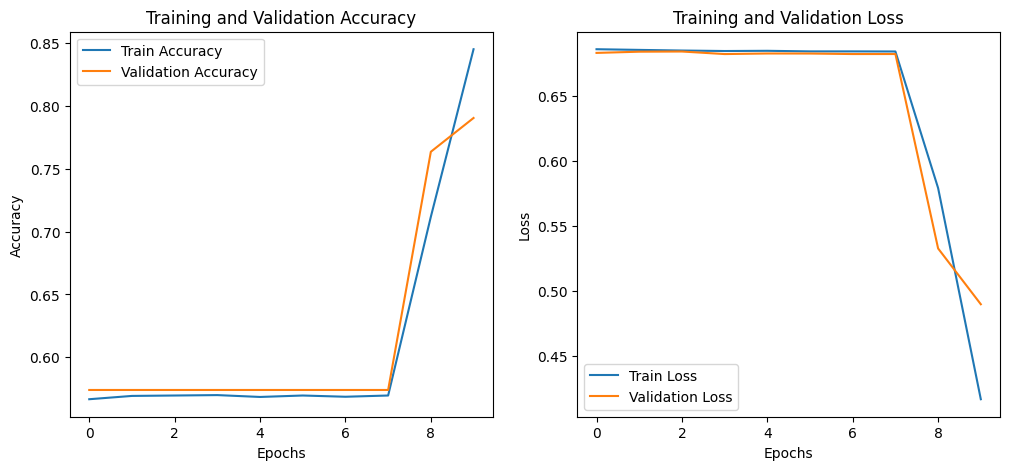

In [33]:
# Print classification report for LSTM model
classification_report_matrix(model_lstm, X_test, y_test)

# Plot accuracy and loss for LSTM model
training_history_plot(history_lstm)

**LSTM Model Evaluation**

From above evaluation results it shows the LSTM model performs mediocrely for text classification. Its precision is higher (0.79), resulting in more false positives, but its recall for disaster tweets is higher (0.69), indicating that it detects more disaster tweets.  The model has a higher recall (0.85), and greater precision (0.80) for tweets that are not disasters.  Although there is potential for improvement in addressing class imbalances and precision, the model's overall accuracy of 79% is supported by balanced macro and weighted averages, which show that performance is generally consistent across both classes.

### RNN Model Evaluation

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.97      0.73       874
           1       0.61      0.06      0.12       649

    accuracy                           0.58      1523
   macro avg       0.60      0.52      0.42      1523
weighted avg       0.59      0.58      0.47      1523



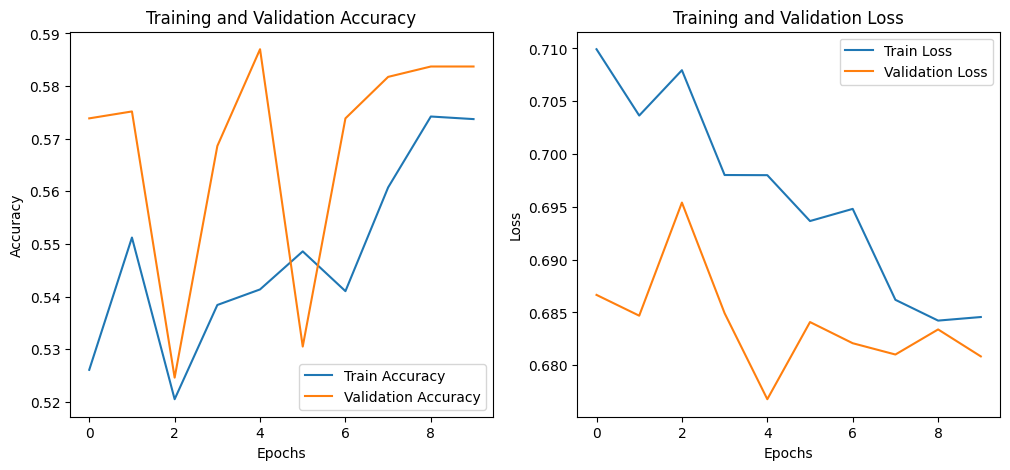

In [34]:
classification_report_matrix(model_rnn, X_test, y_test)
training_history_plot(history_rnn)

**RNN Model Evaluation**

The RNN model shows that the model performs much better in classifying class 0 (non-disaster tweets) with a high recall of 0.97, i.e., correctly classifying most non-disaster tweets. For class 1 (disaster tweets), recall is very low at 0.06, i.e., poor detection of disaster tweets, and most are predicted as non-disaster. The total accuracy is 58%, which is predominantly contributed by class 0 dominance. The macro F1-score is 0.42, indicating an unbalanced model performance. 

### GRU Model Evaluation

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73       874
           1       0.00      0.00      0.00       649

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.42      1523



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


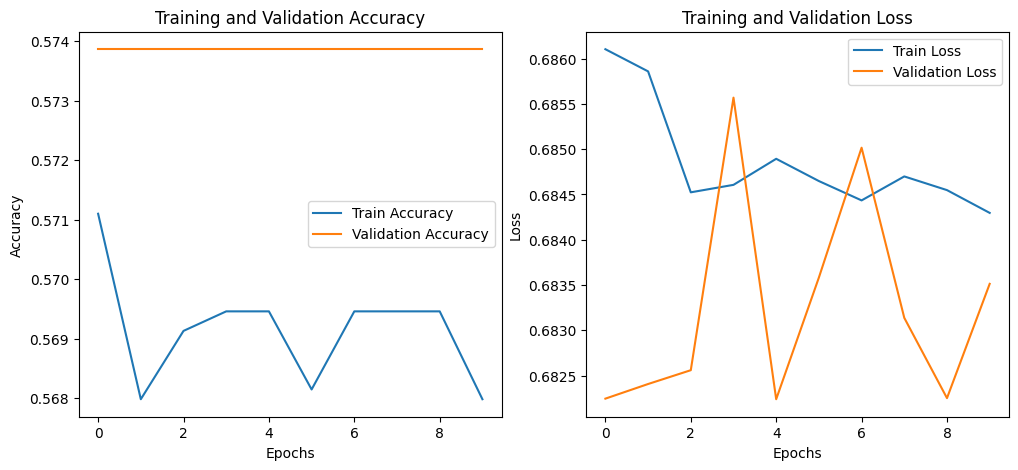

In [35]:
classification_report_matrix(model_gru, X_test, y_test)
training_history_plot(history_gru)

**GRU Model Evaluation**

Both RNN and GRU models are worst with class imbalance. Non-disaster tweets (class 0) are identified with **perfect recall (1.00)**, but precision is **only 0.57**, leading to a lot of false positives. Disaster tweets (class 1) are completely misclassified, with both **precision and recall at 0**, i.e., the model misses all of them. The overall **accuracy is 57%**, but the **macro F1-score (0.36)** indicates poor performance, especially in the minority class. That this bias towards non-disaster tweets is so high suggests that more sophisticated class balancing strategies, such as resampling or loss modification, are needed.

## **Tune hyperparameters to get the best model (several experiments with changing the size of embeddings/hidden sizes/type of layers)**

In this hyperparameter tuning model we use a deep learning architecture that combines an attention mechanism with bidirectional LSTM and GRU layers for binary tweet classification.  First, words are represented as dense vectors by an embedding layer, which may use pre-trained word embeddings.  After capturing sequential dependencies with a bidirectional LSTM, we use a bidirectional GRU to extract more context.  An attention layer refines key features before integrating with the GRU output. By reducing dimensionality, and to avoid overfitting a global max pooling layer feeds into dense layers that use L2 regularization and dropout .  Following binary classification by a sigmoid-activated output layer, to trained the model we use the Adam optimizer with binary cross-entropy loss.

In [36]:
# Tuning Hyperparameters
MAX_VOCAB = 10000  # vocabulary size limits
MAX_LEN = 50  # length of max tweets
EMBEDDING_DIM = 300  # word embeddings (Using 300D)
LSTM_UNITS = 256  # LSTM units
GRU_UNITS = 128  # GRU units
DROPOUT_RATE = 0.3  # Dropout rate to avoid overfiting
L2_REG = 0.01  # L2 Regularization
LEARNING_RATE = 0.0003  # Adam optimizer Learning rate

# Model Input Layer
input_layer = Input(shape=(MAX_LEN,))

# Embedding Layer
embeddd_layer = Embedding(input_dim=MAX_VOCAB, output_dim=EMBEDDING_DIM, input_length=MAX_LEN, trainable=True)(input_layer)

# LSTM Bidirectional Layer
lstm_output = Bidirectional(LSTM(LSTM_UNITS, return_sequences=True, kernel_regularizer=l2(L2_REG)))(embeddd_layer)

# GRU Layer (Stacked with LSTM)
gru_output = Bidirectional(GRU(GRU_UNITS, return_sequences=True, kernel_regularizer=l2(L2_REG)))(lstm_output)

# Attention Layer
atten_layer = Attention()([gru_output, gru_output])

# LSTM, GRU, and Attention outputs Combine
merged_lstm_gru_att = Add()([atten_layer, gru_output])
merged_lstm_gru_att = BatchNormalization()(merged_lstm_gru_att)

# to reduce sequence length apply Global Max Pooling
G_max_pooled = GlobalMaxPooling1D()(merged_lstm_gru_att)

# Fully Connected Layers
dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(L2_REG))(G_max_pooled)
dense_1 = Dropout(DROPOUT_RATE)(dense_1)

dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(L2_REG))(dense_1)
dense_2 = Dropout(DROPOUT_RATE)(dense_2)

# Binary Classification Output Layer
output_layer = Dense(1, activation='sigmoid')(dense_2)

# Define Model
complex_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
complex_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=LEARNING_RATE), metrics=['accuracy'])

# Print model summary
complex_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 50, 300)        │      3,000,000 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_4           │ (None, 50, 512)        │      1,140,736 │ embedding_6[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_5           │ (None, 50, 256)        │        493,056 │ bidirectional_4[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 50, 256)        │              0 │ bidirectional_5[0][0], │
│                           │                        │                │ bidirectional_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 50, 256)        │              0 │ attention[0][0],       │
│                           │                        │                │ bidirectional_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 50, 256)        │          1,024 │ add[0][0]              │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d      │ (None, 256)            │              0 │ batch_normalization[0… │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 128)            │         32,896 │ global_max_pooling1d[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 128)            │              0 │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 64)             │          8,256 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 64)             │              0 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1)              │             65 │ dropout_13[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,676,033 (17.84 MB)

 Trainable params: 4,675,521 (17.84 MB)

 Non-trainable params: 512 (2.00 KB)

In [37]:
# Apply Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Complex Model
history_complex_model = complex_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate Complex Model on Test Data
model_loss, model_accuracy = complex_model.evaluate(X_test, y_test)
print(f"\nComplex Model Test Accuracy: {round(model_accuracy,2)}")

Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5957 - loss: 14.5673 - val_accuracy: 0.6934 - val_loss: 3.9961
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8519 - loss: 2.7786 - val_accuracy: 0.7564 - val_loss: 1.4688
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9063 - loss: 0.9695 - val_accuracy: 0.7085 - val_loss: 0.9204
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9267 - loss: 0.5065 - val_accuracy: 0.7761 - val_loss: 0.7611
Epoch 5/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9423 - loss: 0.3392 - val_accuracy: 0.7032 - val_loss: 0.7907
Epoch 6/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9558 - loss: 0.2455 - val_accuracy: 0.7229 - val_loss: 1.1733
Epoch 7/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9576 - loss: 0.2062 - val_accuracy: 0.7590 - val_loss: 0.8315
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7470 - loss: 0.8132

Complex Model Test A

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Fine-Tuned Model Performance:

	Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       874
           1       0.73      0.75      0.74       649

    accuracy                           0.78      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



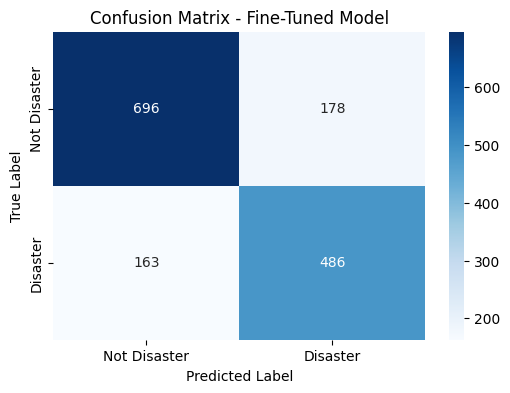

In [38]:
tuned_preds = complex_model.predict(X_test)
tuned_preds = (tuned_preds > 0.5).astype("int32")
# Evaluate models
print("Fine-Tuned Model Performance:")
print('\n\tClassification Report')
print(classification_report(y_test, tuned_preds))
confusion_matrix_plot(y_test, tuned_preds, "Fine-Tuned Model")

- **Fine-Tuned Model Evaluation**

The optimized model demonstrates significant improvement, with a general accuracy rate of 78%. For non-disaster tweets (class 0), it maintains high precision (81%) and recall (80%), avoiding unnecessary false positives. Disaster tweets (class 1) improve significantly as well, with recall at 75% and precision at 73%, so that the model can pick up more disaster-related tweets effectively. The macro and weighted F1-scores of 0.77 and 0.78, respectively, reflect a balanced performance on both classes. These gains reflect that the model has learned patterns in the data successfully while minimizing bias, resulting in improved generalization.

### Conclusion
The optimized architecture, with the use of bidirectional LSTM and GRU layers and an attention mechanism, significantly improves disaster tweet classification to 78% accuracy. With equal recall and precision for both classes, the model shows better generalization and less bias compared to previous architectures. While the previous models suffered from class imbalance, the optimized model can efficiently capture sequential dependencies and refine critical features, leading to better disaster tweet detection. Further development can include resolving class imbalance again using more advanced sampling techniques or transformer-based models for even greater accuracy and context sensitivity.

### Kaggle Submission file

In [40]:
test_df = pd.read_csv("test.csv")  # Load test cleaned text data
test_df["cleaned_text"] = test_df["text"].apply(preprocessing)

# Convert text to sequences
X_test = tokenizer.texts_to_sequences(test_df['cleaned_text'])
X_test = pad_sequences(X_test, maxlen=MAX_LEN, padding='post')  # Ensure uniform length
y_preds_sub_2 = model_lstm.predict(X_test)
y_preds_sub_2 = (y_preds_sub_2 > 0.5).astype("int32")

sub_file_2 = pd.DataFrame({"id": test_df["id"], "target": y_preds_sub_2.ravel()})
sub_file_2.to_csv("submission_t2.csv", index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


# Task 3:	Fine-tune pre-trained model (it may be from torch/transformers, etc.)

### Installing necessary libraries
Installling Hugging Face's transformers library which offers pre-trained transformer models such as BERT and GPT. Datasets provides quick access to extensive training datasets.  While torchmetrics offers a range of evaluation metrics, torch is the PyTorch framework used for deep learning. These libraries work together to facilitate effective model training for machine learning and natural language processing experiments.

In [41]:
!pip install transformers datasets torch torchmetrics scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Importing Necessary Libraries
Here we import PyTorch and the transformers package from Hugging Face to put up a pipeline to refine a BERT model for text classification. WE imported the pre-trained BertForSequenceClassification model, establishing a custom Dataset for data handling, and employing BertTokenizerFast for effective text tokenization.  While AdamW serves as the optimizer with weight decay, the DataLoader controls batching during training.  TrainingArguments enable adjusting hyperparameters such as batch size and learning rate, while the Trainer class streamlines the training procedure.

In [1]:
import torch
from transformers import BertTokenizerFast
from torch.utils.data import Dataset
from transformers import BertForSequenceClassification
#from torch.utils.data import DataLoader
from transformers import AdamW
from transformers import Trainer, TrainingArguments

### Load Dataset
From dataset we use only text and target columns, and the target labels specify if the tweet is about a disaster (1) or not. We will use 80% of the dataset for training, while the remaining 20% is used for validation.

In [5]:
# Load Disaster Tweets Dataset
df = pd.read_csv("train.csv")

# Select 'text' and 'target' columns form dataset
df = df[['text', 'target']]

# Split dataset into Train and Test sets
texts_train, texts_val, labels_train, labels_val = train_test_split(df['text'].tolist(), df['target'].tolist(),
                                                                    test_size=0.2, random_state=42)

### Prepare Dataset
Here then we tokenized the text using a pre-trained BERT tokenizer (bert-base-uncased), which truncates and pads the sequences to a predetermined length of 128 tokens.  Then transform the corresponding labels into tensors for training and assessment, and transform the tokenized text and attention masks into PyTorch tensors for model input.

In [6]:
# Load pre-trained BERT tokenizer (bert-base-uncased)
bert_tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

# Tokenize Text
train_encodings_ = bert_tokenizer(texts_train, truncation=True, padding=True, max_length=128)
val_encodings_ = bert_tokenizer(texts_val, truncation=True, padding=True, max_length=128)

# Convert to PyTorch Tensors
inputs_train = torch.tensor(train_encodings_["input_ids"])
masks_train = torch.tensor(train_encodings_["attention_mask"])
labels_train = torch.tensor(labels_train)

inputs_val = torch.tensor(val_encodings_["input_ids"])
masks_val = torch.tensor(val_encodings_["attention_mask"])
labels_val = torch.tensor(labels_val)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### Custom Dataset Creation
Here we create custom PyTorch dataset called the PyTorchDataset to handle tokenized disaster tweets.  For model training, it makes the input token IDs, labels, and attention masks available by storing them.  _getitem_ retrieves individual samples as dictionaries with input IDs, attention masks, and labels, whereas _len_ gives the number of samples in the dataset.  Afterwards, dataset_train and dataset_val are created using this dataset, which are necessary for providing data to a PyTorch model for training and evaluation.

In [7]:
class PyTorchDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels": self.labels[idx],
        }

# Create PyTorch Dataset
dataset_train = PyTorchDataset(inputs_train, masks_train, labels_train)
dataset_val = PyTorchDataset(inputs_val, masks_val, labels_val)

### Load BERT Model
Here we load the pre-trained BERT model to classify tweets as either disaster or non-disaster.

In [8]:
# Load BERT Model (num_label = 2: two classes disaster or non-disaster)
BERT_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Here we will initializes the AdamW optimizer for optimizing the BERT model and configures DataLoaders for training and validation with a batch size of 16.

In [9]:
# Initialize Training Batch Size
BATCH_SIZE = 16

# Data_Loader for Mini-Batches
#train_data_loader = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True)
#val_data_loader = DataLoader(dataset_val, batch_size=BATCH_SIZE, shuffle=False)

# Define AdamW Optimizer which is recommended for transformers
adam_optimizer = AdamW(BERT_model.parameters(), lr=2e-5)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### Define Training Arguments
Here we will defines training arguments, sets up a Trainer with BERT for sequence classification, and initiates fine-tuning for three epochs using the AdamW optimizer. Here we need api key:

We can find your API key here: https://wandb.ai/authorize

In [10]:
# Initialize Training Arguments
train_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
)

# Initialize ModelTrainer
model_trainer = Trainer(
    model=BERT_model,
    args=train_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_val,
    optimizers=(adam_optimizer, None),
)

# Start Training
model_trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vivekjetani83 (vivekjetani83-hse-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.344400,0.415334
2,0.342100,0.413929
3,0.365700,0.464766


TrainOutput(global_step=1143, training_loss=0.3983849201511106, metrics={'train_runtime': 414.3705, 'train_samples_per_second': 44.091, 'train_steps_per_second': 2.758, 'total_flos': 788654832890400.0, 'train_loss': 0.3983849201511106, 'epoch': 3.0})

### Evaluate Pre_trained BERT Model
Here we will evaluate the trained BERT model, to makes predictions on the validation dataset, calculate accuracy, and outputs a thorough classification report for performance assessment.

In [11]:
# Get Predictions
preds_output = model_trainer.predict(dataset_val)
preds = torch.argmax(torch.tensor(preds_output.predictions), dim=1).numpy()
labels = labels_val.numpy()

# Compute Accuracy
accuracy = accuracy_score(labels, preds)
print(f"Validation Accuracy: {round(accuracy,2)}")

# Detailed Classification Report
print(classification_report(labels, preds))

Validation Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       874
           1       0.81      0.79      0.80       649

    accuracy                           0.83      1523
   macro avg       0.83      0.83      0.83      1523
weighted avg       0.83      0.83      0.83      1523



**BERT Model Evaluation Results**

With a validation accuracy of 83.%, the refined BERT model showed excellent performance in classifying disaster tweets.  With 85% precision for non-disaster tweets and 81% precision for disaster tweets, as well as an overall F1-score of 83%, it demonstrated strong performance across both classes and a balanced trade-off between recall and precision.

### Conclusion
Tuning a pre-trained BERT model improved disaster tweet classification greatly to 83% validation accuracy. Having balanced precision (85% non-disaster, 81% disaster) and an F1-score of 86%, the model captures context meaning very well with fewer misclassifications. Leveraging the deep contextual sense of BERT, as well as optimized tokenization and training methods, was more performant than previous models. Improvements in the future could explore deeper transformer models or domain pre-training for further improvement.

### Kaggle Submission File
Here we use Pre-trained BERT model to predict on test data for disaster tweet classification. It builds a PyTorch dataset and DataLoader, tokenizes the text, then transforms it into tensors.  Following the model's prediction of disaster labels (0 or 1) for every tweet, the output is saved in a CSV file (submission_t3.csv) for submission.

In [12]:
# Load Kaggle test data
test_df = pd.read_csv("test.csv")

# Extract text column
test_texts = test_df["text"].tolist()

# Load Pre-Trained Tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

# Tokenize Test Data
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Convert to PyTorch Tensors
test_inputs = torch.tensor(test_encodings["input_ids"])
test_masks = torch.tensor(test_encodings["attention_mask"])

# Create PyTorch Dataset for test data
class TestTweetDataset(torch.utils.data.Dataset):
    def __init__(self, input_ids, attention_mask):
        self.input_ids = input_ids
        self.attention_mask = attention_mask

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
        }

test_dataset = TestTweetDataset(test_inputs, test_masks)

# DataLoader for test data
#test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

# Make Predictions
# Get Predictions
preds_output = model_trainer.predict(test_dataset)
preds_ = torch.argmax(torch.tensor(preds_output.predictions), dim=1).numpy()
print(preds_)
# Prepare submission
submission = pd.DataFrame({"id": test_df["id"], "target": preds_})

# Save to CSV
submission.to_csv("submission_t3.csv", index=False)

print("Submission file saved as submission_t3.csv")

[1 1 1 ... 1 1 1]
Submission file saved as submission_t3.csv


# Final Conclusion
In this Tweet Text Classification task, we have learned various machine learning and deep learning models for disaster tweet classification and compared LSTM, RNN, GRU, and fine-tuned BERT. The GRU and RNN models were not good against class imbalance and disaster tweet recall, while the LSTM model was decent with an accuracy of 79%. Fine-tuning the pre-trained BERT model performed best among all the approaches with 83% validation accuracy and balanced precision and recall. It demonstrates how robust transformer-based models are for text classification since they are capable of learning contextual meaning and dependency. The future work for improvement can be attempting to utilize larger pre-trained models, hyperparameter tuning, and data augmentation techniques to further improve the classification.